# Baseline Model based on U-Net

In [1]:
import os

# needed to get the path right
os.chdir("..")

## Training

In [2]:
from baseline.trainer import Trainer

trainer = Trainer()

Segmentation Models: using `tf.keras` framework.


In [3]:
model = trainer.get_model()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d[0][0]             
____________________________________________________________________________________________

In [4]:
%time history = trainer.train_from_simple_dataloader(dataset_size=10, batch_size=1, epochs=20)

Epoch 1/20
10/10 - 42s - loss: 1.3455 - iou_score: 0.1924 - f1-score: 0.3134 - f2-score: 0.3630 - recall: 0.4506 - precision: 0.2819 - val_loss: 1.5217 - val_iou_score: 0.1645 - val_f1-score: 0.2648 - val_f2-score: 0.3499 - val_recall: 0.5564 - val_precision: 0.2207
Epoch 2/20
10/10 - 33s - loss: 1.1353 - iou_score: 0.2720 - f1-score: 0.4167 - f2-score: 0.4907 - recall: 0.6248 - precision: 0.3712 - val_loss: 1.5934 - val_iou_score: 0.2027 - val_f1-score: 0.3137 - val_f2-score: 0.4379 - val_recall: 0.7646 - val_precision: 0.2427
Epoch 3/20
10/10 - 32s - loss: 1.0298 - iou_score: 0.3194 - f1-score: 0.4713 - f2-score: 0.5557 - recall: 0.7051 - precision: 0.4182 - val_loss: 1.5984 - val_iou_score: 0.1960 - val_f1-score: 0.3049 - val_f2-score: 0.4236 - val_recall: 0.7326 - val_precision: 0.2375
Epoch 4/20
10/10 - 32s - loss: 0.9671 - iou_score: 0.3498 - f1-score: 0.5041 - f2-score: 0.5932 - recall: 0.7478 - precision: 0.4472 - val_loss: 1.5890 - val_iou_score: 0.2002 - val_f1-score: 0.3105 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


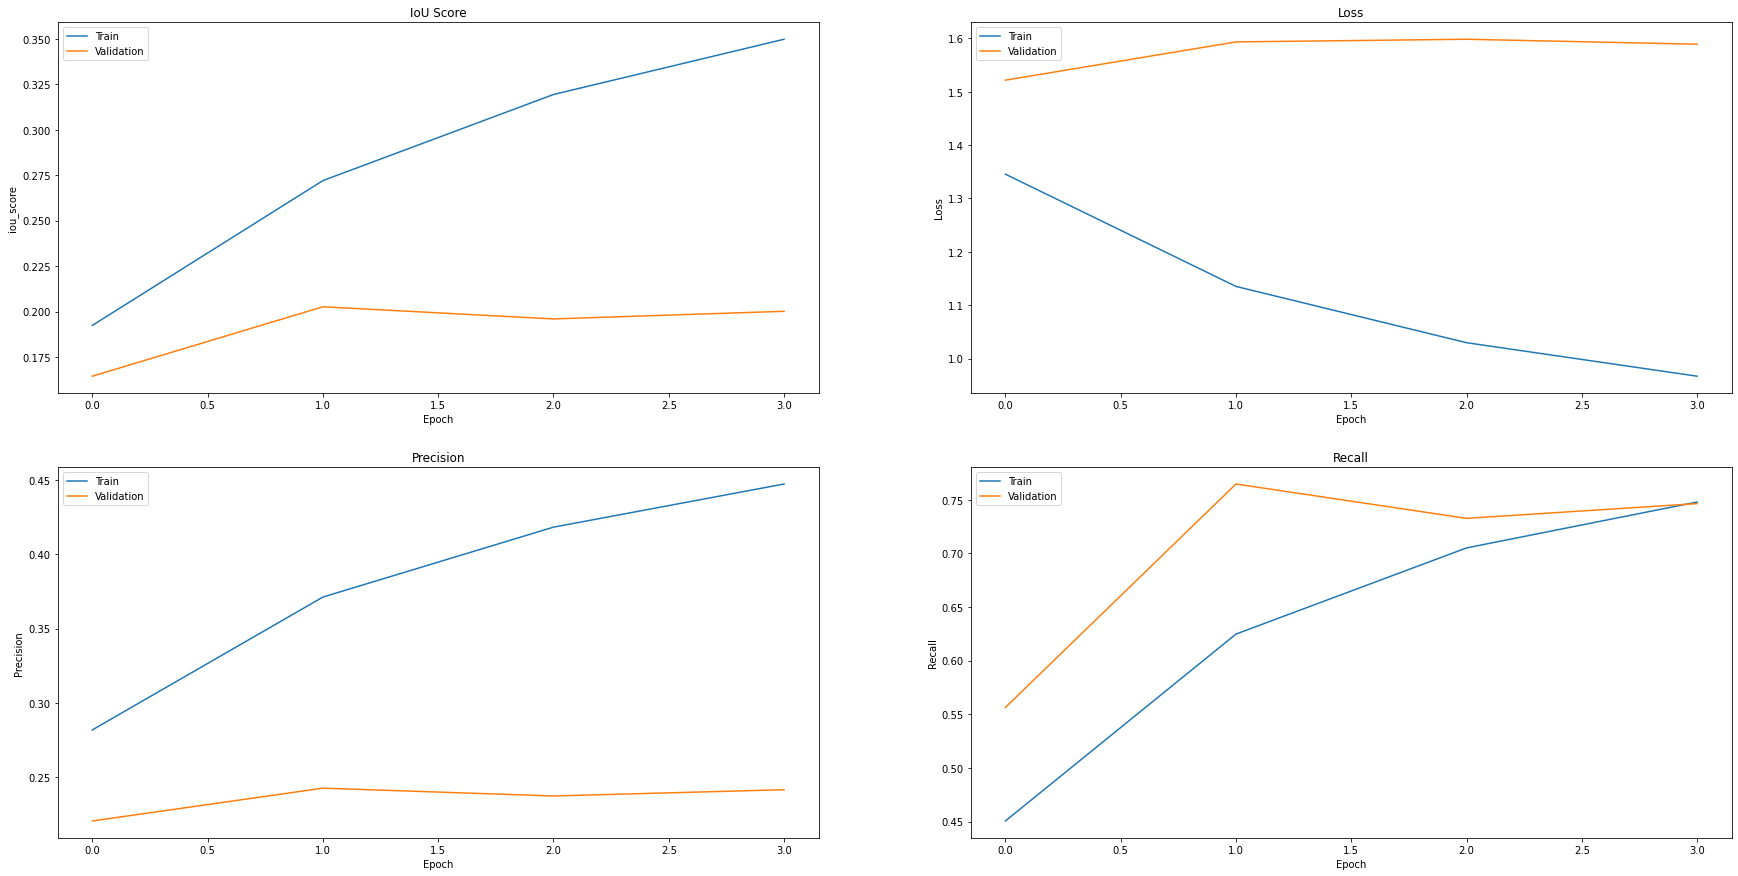

In [23]:
%load_ext autoreload
%autoreload 2

from utils.helper import Visualisation

Visualisation().plot_curves(history)

## Prediction

In [6]:
import segmentation_models as sm
from constants import TRAIN_DIR
from utils.dataloader import SimpleDataLoader

simple_data_loader = SimpleDataLoader(
    backbone=Trainer.BACKBONE,
    images_path=os.path.join(TRAIN_DIR, "images"),
    mask_path=os.path.join(TRAIN_DIR, "masks"),
    size=10
)

train_images = simple_data_loader.get_images()
train_masks = simple_data_loader.get_masks()

(512, 512, 3)
(1, 512, 512, 3)


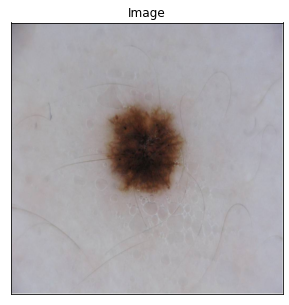

In [7]:
import numpy as np

train_image = train_images[1]

print(train_image.shape)
train_image = np.expand_dims(train_image, axis=0)  # add batch dimension
print(train_image.shape)

Visualisation().plot_images(image=train_image.squeeze())

In [8]:
model.load_weights(os.path.join("baseline", "export", "baseline.h5"))

In [9]:
predicted_mask = model.predict(train_image).round()
print(predicted_mask.shape)

(1, 512, 512, 1)


In [10]:
predicted_mask[..., 0].shape

(1, 512, 512)

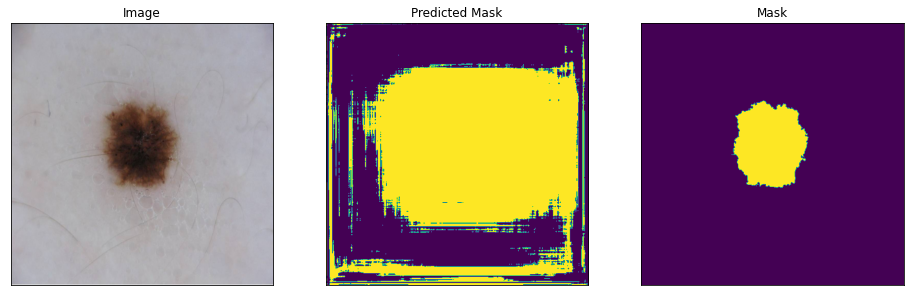

In [12]:
Visualisation().plot_images(
    image=train_image.squeeze(),
    predicted_mask=predicted_mask[..., 0].squeeze(),
    mask=train_masks[1]
)

(1, 512, 512, 3)
(1, 512, 512, 1)


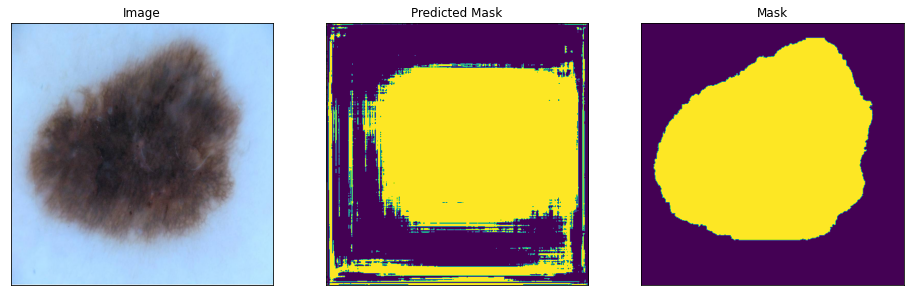

(1, 512, 512, 3)
(1, 512, 512, 1)


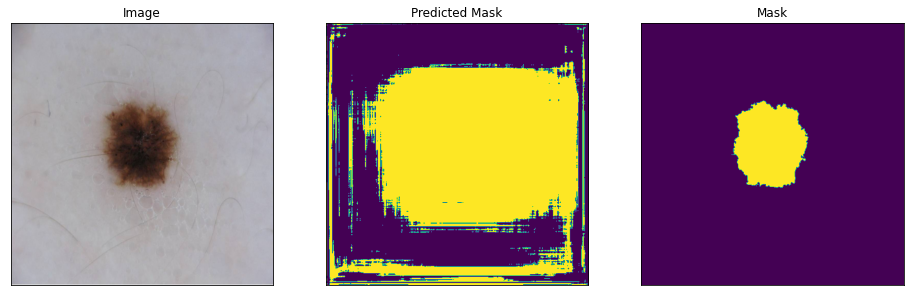

(1, 512, 512, 3)
(1, 512, 512, 1)


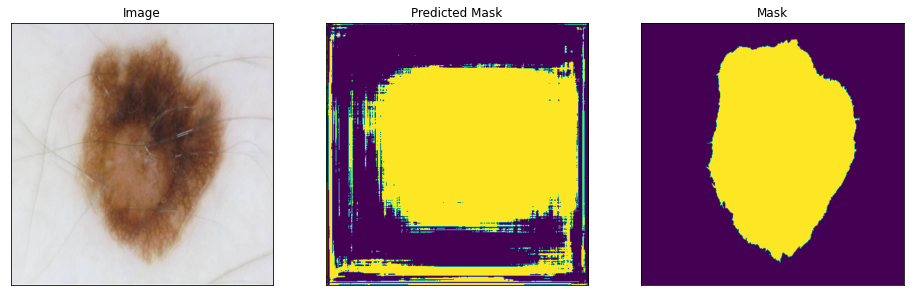

(1, 512, 512, 3)
(1, 512, 512, 1)


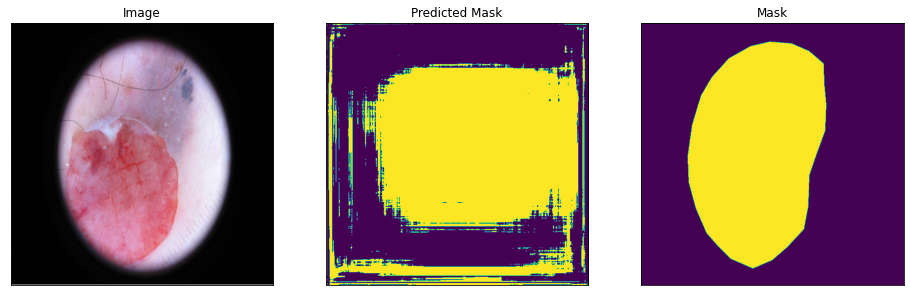

In [15]:
for index, train_image in enumerate(simple_data_loader.get_images()):
    if index > 3:
        break
    train_image = np.expand_dims(train_image, axis=0)
    print(train_image.shape)
    predicted_mask = model.predict(train_image).round()
    print(predicted_mask.shape)
    mask = simple_data_loader.get_masks()[index]
    
    Visualisation().plot_images(
        image=train_image.squeeze(),
        predicted_mask=predicted_mask[..., 0].squeeze(),
        mask=mask.squeeze()
    )